In [27]:
# Celebal Summmer internship - Week 6 Assignment 
#Train multiple machine learning models and evaluate their performance using metrics such as accuracy, precision,
#recall, and F1-score. Implement hyperparameter tuning techniques like GridSearchCV and RandomizedSearchCV 
#to optimize model parameters. Analyze the results to select the best-performing model.
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of features:", X.shape)
print("Target classes:", data.target_names)
X.head()


Shape of features: (569, 30)
Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
svm = SVC()

In [30]:
# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'SVM': svm}

for name, model in models.items():
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")


Logistic Regression -> Accuracy: 0.97, Precision: 0.97, Recall: 0.99, F1-score: 0.98
Random Forest -> Accuracy: 0.96, Precision: 0.96, Recall: 0.99, F1-score: 0.97
SVM -> Accuracy: 0.98, Precision: 0.97, Recall: 1.00, F1-score: 0.99


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print("Best SVM Parameters:", grid_search.best_params_)


Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best RF Parameters:", random_search.best_params_)


Best RF Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [40]:
# Re-evaluation
final_models = {'Tuned SVM': best_svm, 'Tuned Random Forest': best_rf}

for name, model in final_models.items():
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")


Tuned SVM -> Accuracy: 0.98, Precision: 0.97, Recall: 1.00, F1-score: 0.99
Tuned Random Forest -> Accuracy: 0.96, Precision: 0.96, Recall: 0.99, F1-score: 0.97


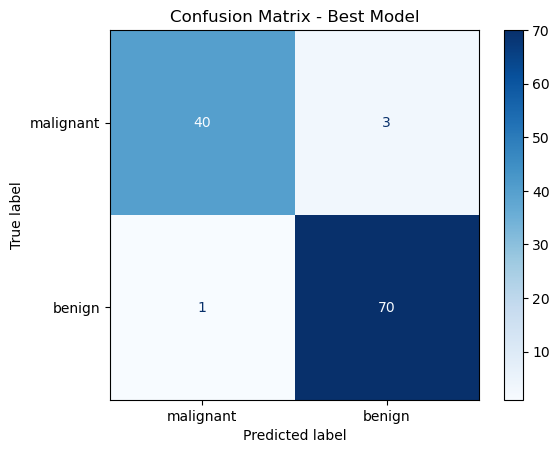

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for best model 
best_model = best_rf  
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Model")
plt.show()


In [39]:
print("Conclusion: Best performing model is -", "Random Forest" if f1_score(y_test, best_rf.predict(X_test)) > f1_score(y_test, best_svm.predict(X_test)) else "SVM")


Conclusion: Best performing model is - SVM
